In [15]:
import numpy as np
import time
from annchor.datasets import load_digits_large,load_digits
import matplotlib.pyplot as plt

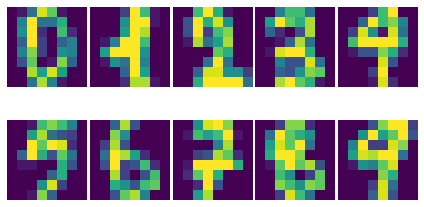

In [22]:
k=35

X = load_digits_large()['X']
y = load_digits_large()['y']
neighbor_graph = load_digits_large()['neighbor_graph']

nx = X.shape[0]

fig,axs = plt.subplots(2,5)
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(X[y==i][0].reshape(8,8))
    ax.axis('off')

plt.tight_layout(h_pad=0.1, w_pad=0.3)
plt.show()

In [23]:
from annchor.distances import wasserstein
from annchor import compare_neighbor_graphs



In [24]:
from annchor import Annchor

start_time = time.time()

ann = Annchor(X,
              wasserstein,
              n_anchors=25,
              n_neighbors=k,
              min_prob=0.05,
              random_seed=0,
              n_samples=5000,
              partitions=3)

ann.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))


# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                k)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))
print('ANNchor Evals: %d evaluations  (%5.3f%% of BruteForce)' % (ann.evals,100*ann.evals/(nx*(nx-1)/2)))

ANNchor Time: 103.740 seconds
ANNchor Accuracy: 198 incorrect NN pairs (0.101%)
ANNchor Evals: 1483018 evaluations  (9.392% of BruteForce)


In [25]:
from annchor import Annchor


start_time = time.time()


# Call ANNchor
ann = Annchor(X,
              wasserstein,
              n_anchors=25,
              n_neighbors=k,
              min_prob=0.025,
              random_seed=0,
              n_samples=5000,
              partitions=3,
              locality=5,
              loc_thresh=1,)

ann.fit_lo_mem()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))


# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                k)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))
print('ANNchor Evals: %d evaluations  (%5.3f%% of BruteForce)' % (ann.evals,100*ann.evals/(nx*(nx-1)/2)))

get_sample: 5.261
get_lr_partitions: 0.003
get_locality: 0.454
get IJs and indices 0.621
get approx IJs 0.897
do lin reg 1.603
adjust by partition 2.506
clip by bounds 3.190
get_LRApprox_lomem 3.983
ANNchor Time: 102.053 seconds
ANNchor Accuracy: 105 incorrect NN pairs (0.053%)
ANNchor Evals: 1660839 evaluations  (10.519% of BruteForce)


In [31]:
e=7
nx=1600
k=15
print('%5.3f' % (100*35/(nx*15)))

0.146
